<a href="https://colab.research.google.com/github/sarahejaz/gonotes/blob/main/video2text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DeepSpeech Model


In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
#@title
import os
from os.path import exists, join, basename, splitext

if not exists('deepspeech-0.6.1-models'):
  !apt-get install -qq sox
  !pip install -q deepspeech-gpu==0.6.1 youtube-dl
  !wget https://github.com/mozilla/DeepSpeech/releases/download/v0.6.1/deepspeech-0.6.1-models.tar.gz
  !tar xvfz deepspeech-0.6.1-models.tar.gz
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2-3ubuntu0.18.04.1) ...
Selecting previously un

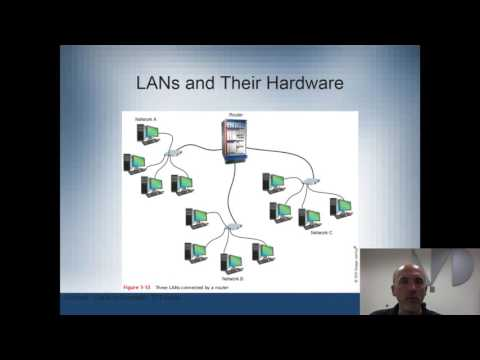

In [4]:
YOUTUBE_ID = '2xbAiKyTveU'


YouTubeVideo(YOUTUBE_ID)

Extracting Audio From Video and then converting it to text:

In [5]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav >> Inference.txt

[youtube] 2xbAiKyTveU: Downloading webpage
[youtube] 2xbAiKyTveU: Downloading MPD manifest
[dashsegments] Total fragments: 41
[download] Destination: test.webm
[download] 100% of 6.04MiB in 00:13
[ffmpeg] Destination: test.wav
Deleting original file test.webm (pass -k to keep)
Loading model from file deepspeech-0.6.1-models/output_graph.pbmm
TensorFlow: v1.14.0-21-ge77504a
DeepSpeech: v0.6.1-0-g3df20fe
2020-12-18 15:40:51.000810: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-12-18 15:40:51.002208: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2020-12-18 15:40:51.048229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-18 15:40:51.049131: I tensorflow/core/common_runti

In [6]:
#!git clone https://github.com/ottokart/punctuator2

In [7]:
#from punctuator2 import models

In [8]:
!pip install punctuator

     |████████████████████████████████| 1.4MB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp36-none-any.whl size=9693 sha256=ace8588a33ebd9409ca54ce1a8684ec85159c9cd6822e2506c2501e12be3ee70
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for punctuator: filename=punctuator-0.9.6-cp36-none-any.whl size=25154 sha256=6671c8388a1554e52d09bbdbc950a26f5250e5ec5a8f23a648424ad2c0170edf
  Stored in directory: /root/.cache/pip/wheels/9a/4b/83/024d41a639f2945705721ebc0b9c596880d492a487925f941a
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434675 sha256=f32eb761281e6342ce73339bd53ac11dd0d4d71fd64d6fa9e1d1eda8d52f0f83
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built

In [9]:
!pip install gdown

In [10]:
import gdown

url = 'https://drive.google.com/uc?id=0B7BsN5f2F1fZd1Q0aXlrUDhDbnM'
output = 'Demo-Europarl-EN.pcl'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=0B7BsN5f2F1fZd1Q0aXlrUDhDbnM
To: /content/Demo-Europarl-EN.pcl
144MB [00:02, 55.8MB/s]


'Demo-Europarl-EN.pcl'

In [11]:
from punctuator import Punctuator
f = open('Inference.txt', "r")
lines = f.readline()
f.close()
p = Punctuator('Demo-Europarl-EN.pcl')
punctLines=p.punctuate(lines)
print(punctLines)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Morning, one computes networking discussion and professor canard were to go to chapter. One of the text which is introduction to networking were talking about what the purpose of the network is for mainly the different types of devices, as well as a dressing types of network that you have and their applications we licences and network in vigil setout the course so to her network service. Those. You might also hear the term application to proposes a network that share different types of what we call resources or resource could be something as simple as a file or a printer. It could be. A website could be an entire earpieces, so the willis, the tar resources well as application under the hood mightiest service refuter into the servants with might say, protocol trident types of applications. It all see disgust in the text, clientele and peter being the two main types which is of the machines. Well, so it cliverer as you'll see the listing at the double type of networks that we see to day 

In [12]:
punctLines
file1 = open("PunctuatedText.txt","w+")

In [13]:
file1.write(punctLines)

5934

#LSA Centroid Method

In [14]:
! pip install git+git://github.com/miso-belica/sumy.git

  Cloning git://github.com/miso-belica/sumy.git to /tmp/pip-req-build-zyc2zm3n
  Running command git clone -q git://github.com/miso-belica/sumy.git /tmp/pip-req-build-zyc2zm3n
     |████████████████████████████████| 10.1MB 7.0MB/s 
  Created wheel for sumy: filename=sumy-0.8.1-py2.py3-none-any.whl size=87940 sha256=05cdc0d11a588f585c8969048739911f8f0e6bd51142ca4dc502bc3c0d05209b
  Stored in directory: /tmp/pip-ephem-wheel-cache-1xnjvbvj/wheels/ca/d7/7c/6e918e8342b863a32773e60f127b2714872821e5604936c0ea
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21683 sha256=039443bc51a31a98f609a5a3c681bf5d3129a151800380f6f1ee9888d6cb1f07
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=ef4626c12365d87c82a5906f8782aee9ab12374e2533fe81a791c3483ae0b181
  Stored in directory: /root/.cache/pip/wheels/33/4e/a

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [17]:
def lemmSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemm_sentence=[]
    for word in token_words:
        lemm_sentence.append(wordnet_lemmatizer.lemmatize(word))
        lemm_sentence.append(" ")
    return "".join(lemm_sentence)


In [18]:
# -*- coding: utf-8 -*-

from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


LANGUAGE = "english"
SENTENCES_COUNT = 10

file2 = open("SummarizedText.txt","w+")

if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/Automatic_summarization"
    #parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
    # or for plain text files
    parser = PlaintextParser.from_file("PunctuatedText.txt", Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)
    sentences=[]
    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        sentences.append(sentence)
        file2.write(str(sentence))

In [19]:
pLines=[punctLines]
print(pLines)


["Morning, one computes networking discussion and professor canard were to go to chapter. One of the text which is introduction to networking were talking about what the purpose of the network is for mainly the different types of devices, as well as a dressing types of network that you have and their applications we licences and network in vigil setout the course so to her network service. Those. You might also hear the term application to proposes a network that share different types of what we call resources or resource could be something as simple as a file or a printer. It could be. A website could be an entire earpieces, so the willis, the tar resources well as application under the hood mightiest service refuter into the servants with might say, protocol trident types of applications. It all see disgust in the text, clientele and peter being the two main types which is of the machines. Well, so it cliverer as you'll see the listing at the double type of networks that we see to da

In [20]:
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np

In [36]:
lemm_file= open("LemmatizedText.txt","w+")
final_lines=[]
sentences=""
for line in lines_list:
    lemm_sentence=lemmSentence(line)
    lemm_file.write(lemm_sentence)
    final_lines.append([lemm_sentence])
    sentences+=lemm_sentence
lemm_file.close()
lines_list = nltk.tokenize.sent_tokenize(sentences)
print(lines_list)
vectorizer = CountVectorizer(stop_words='english')
results = vectorizer.fit_transform([sentences])
print(results.toarray())
feature_array = np.array(vectorizer.get_feature_names())
cv_sorting = np.argsort(results.toarray()).flatten()[::-1]
n = 10
words = feature_array[cv_sorting][:n]
result=np.sort(results.toarray()).flatten()[::-1]
count= result[:n]
print(words,count)
print(final_lines)
print(sentences)

['Morning , one computes networking discussion and professor canard were to go to chapter .', 'One of the text which is introduction to networking were talking about what the purpose of the network is for mainly the different type of device , a well a a dressing type of network that you have and their application we licence and network in vigil setout the course so to her network service .', 'Those .', 'You might also hear the term application to proposes a network that share different type of what we call resource or resource could be something a simple a a file or a printer .', 'It could be .', 'A website could be an entire earpiece , so the willis , the tar resource well a application under the hood mightiest service refuter into the servant with might say , protocol trident type of application .', 'It all see disgust in the text , clientele and peter being the two main type which is of the machine .', "Well , so it cliverer a you 'll see the listing at the double type of network th

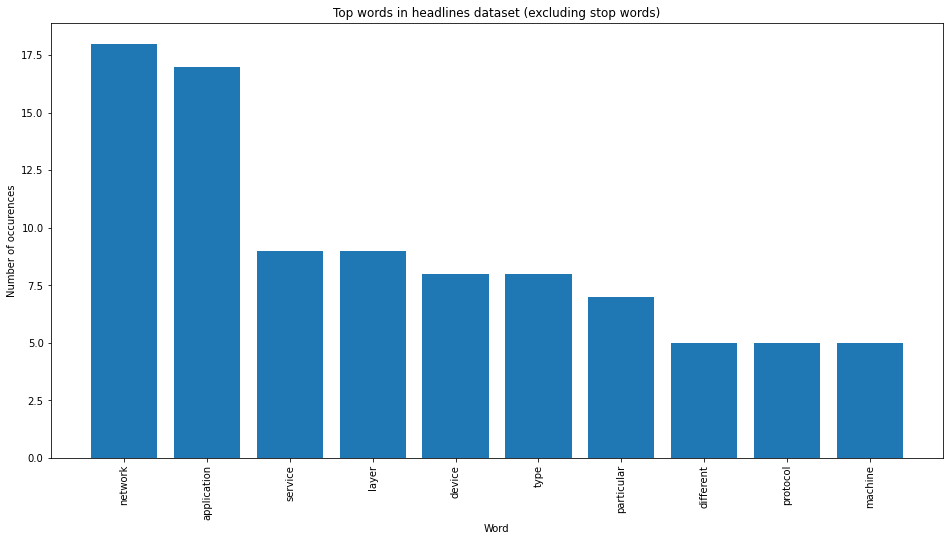

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)),count)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [38]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [39]:
CV = CountVectorizer(stop_words='english', max_features=40000)
sample = final_lines
Matrix= CV.fit_transform(lines_list)
n_topics = 8
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(Matrix)

In [41]:
sort_lsa = np.argsort(lsa_topic_matrix).flatten()[::-1]
words = feature_array[sort_lsa][:20]
print(sort_lsa,words)


[5 4 3 2 1 0 6 7 4 5 2 0 3 1 6 7 5 4 0 2 1 6 3 7 5 0 4 1 2 7 6 3 5 4 0 1 2
 6 3 7 5 4 0 2 1 6 3 7 0 5 7 4 1 6 3 2 0 4 5 6 7 2 3 1 0 4 7 6 2 5 3 1 0 4
 6 5 7 2 3 1 5 4 0 2 6 1 3 7 2 3 7 4 0 6 5 1 6 0 3 1 5 7 2 4 0 3 6 1 5 7 2
 4 0 3 7 1 5 6 4 2 0 3 1 6 5 2 7 4 7 0 3 5 1 4 2 6 7 1 5 0 2 4 3 6 1 0 2 4
 7 6 5 3 5 4 2 0 3 1 6 7 0 4 7 6 5 2 3 1 2 0 5 7 3 6 1 4 5 2 0 3 1 4 6 7 0
 3 1 5 7 6 4 2 6 7 0 3 4 1 2 5 2 0 6 5 1 7 4 3 2 0 6 7 5 3 1 4 0 1 6 4 2 5
 3 7 0 7 6 3 4 5 2 1 0 2 7 6 4 5 3 1 0 4 7 6 2 5 3 1 4 3 2 0 7 1 6 5 2 5 7
 6 0 3 1 4 0 4 6 3 2 7 5 1 0 3 4 7 6 1 2 5 0 3 2 1 4 5 6 7 0 6 2 4 7 5 3 1
 7 6 4 0 1 3 2 5 0 3 4 6 7 2 1 5 6 3 2 1 0 5 7 4 0 3 1 5 2 7 4 6 4 3 5 0 2
 1 6 7] ['application' 'appear' 'apology' 'alphabet' 'allowing' 'access' 'area'
 'available' 'appear' 'application' 'alphabet' 'access' 'apology'
 'allowing' 'area' 'available' 'application' 'appear' 'access' 'alphabet']
